### Problem Set 3

who is the central player in this
technology area ? Who is the leader ? Who is an irrelevant actor ?

In [5]:
import networkx as nx
import operator
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import community 
from community import community_louvain

from networkx.algorithms.community import k_clique_communities
from operator import itemgetter

In [6]:
G = nx.read_edgelist('network_prof.txt')
       
# function that generate connected components as subgraphs:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

# check number of components of the network:

graph_max = max(connected_component_subgraphs(G)) # subcomponent with max number of nodes
graph_min = min(connected_component_subgraphs(G)) # subcomponent with min number of nodes

print("Information about the network: \n" + nx.info(G))
print("\nInformation about the max subgraph: \n" + nx.info(graph_max))
print("\nInformation about the min subgraph: \n" + nx.info(graph_min))

if G.number_of_nodes() == graph_max.number_of_nodes():
    # the number of nodes of the network is equal to the max subgraph. so there is only one subgraph.
    # we could have done the same with the min
    print("\nWe only have one directed component")

Information about the network: 
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910

Information about the max subgraph: 
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910

Information about the min subgraph: 
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910

We only have one directed component


In [7]:
# some important variables about the network

nodes = list(G.nodes)
num_nodes = G.number_of_nodes()

#position = nx.spring_layout(G) # position nodes using Fruchterman-Reingold force-directed algorithm.
#with open('position.p', 'wb') as fp:
#    pickle.dump(position, fp, protocol=pickle.HIGHEST_PROTOCOL)


In [8]:
with open('position.p', 'rb') as fp:
    position = pickle.load(fp)

In [9]:
#position1=position
#position2 = nx.spring_layout(G)
#position3 = nx.spring_layout(G)
#position4 = nx.spring_layout(G)

In [10]:
# plot function
def plot_network(G, position, nodes, Z, color_special, first_figure, last_figure, label):
    # G is the graph
    # position is calculated using Fruchterman-Reingold force-directed algorithm.
    # nodes: all nodes
    # Z: subset of nodes to highlight
    # color_special = color of these highlighted nodes
    # first_figure: start a new figure?
    # last_figure: last figure? False if there will be other to put togheter 
    
    if first_figure==True: plt.figure(figsize=(10,10)) #create a new figure
        
    if first_figure == True: # not re-draw nodes/edges if it is not the new figure
        nx.draw_networkx_nodes(G, position, nodes, node_size = 7, node_color = "#fffd37" , alpha = 0.7)
        nx.draw_networkx_edges(G, position, alpha = 0.5)
        
    # special nodes
    if len(Z)>0: # non empty 
        nx.draw_networkx_nodes(G, position, Z, node_size = 17, node_color = color_special)
        #if first_figure==True and last_figure==True:
         #   nx.draw_networkx_labels(G, position, label, font_color= 'b', font_weight='bold', alpha=1)
    
    plt.axis('off')
    
    if last_figure==True: plt.show()
    

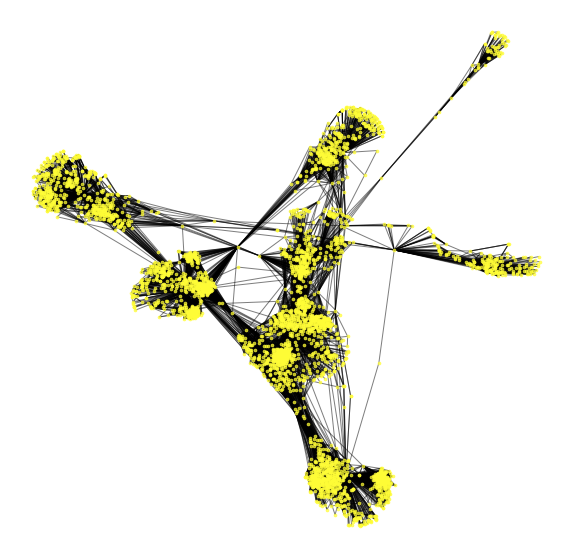

In [12]:
# plot of the network:
plot_network(G, position, nodes, [], 'r', True, True, [])

## Significant Nodes
At this point we have to analyise our network. To understand the leader and irrelevant actors, we measure the vertex importance. We will analize

- Node degree
- Betweenness
- Eigenvector centrality

**Node Degree**: The node degree is the number of edges adjacent to the node

In [13]:
nodes_degree = G.degree
print(f" For example, node number '{list(nodes_degree)[0][0]}' degree is equal to {list(nodes_degree)[0][1]}.")

 For example, node number '0' degree is equal to 347.


In our dataset, each node is a person. Then the degree of that person is the number of people he/she is talking to. Let us see who are the people with more contacts:

In [14]:
degrees = [val for (node, val) in G.degree()] #only the values
nodes = [node for (node, val) in G.degree()] #only the node

centrality = [x for _,x in sorted(zip(degrees,nodes), reverse=True)]
centrality_10 = centrality[:10]

degree_most_connected = G.degree(centrality)

#degree_most_connected = degree_most_connected[0:10] # first ten nodes

labels= [None] * num_nodes

print("Nodes with highest DEGREE:")
for i in range(10):
    labels[int(np.array(degree_most_connected)[i,0])]=str(i+1)
    print(f"Position #{i+1}: node {list(degree_most_connected)[i][0]} with degree {list(degree_most_connected)[i][1]}")

Nodes with highest DEGREE:
Position #1: node 107 with degree 1045
Position #2: node 1684 with degree 792
Position #3: node 1912 with degree 755
Position #4: node 3437 with degree 547
Position #5: node 0 with degree 347
Position #6: node 2543 with degree 294
Position #7: node 2347 with degree 291
Position #8: node 1888 with degree 254
Position #9: node 1800 with degree 245
Position #10: node 1663 with degree 235


Highlight these nodes in the network:

Highlight nodes with the highest centrality:


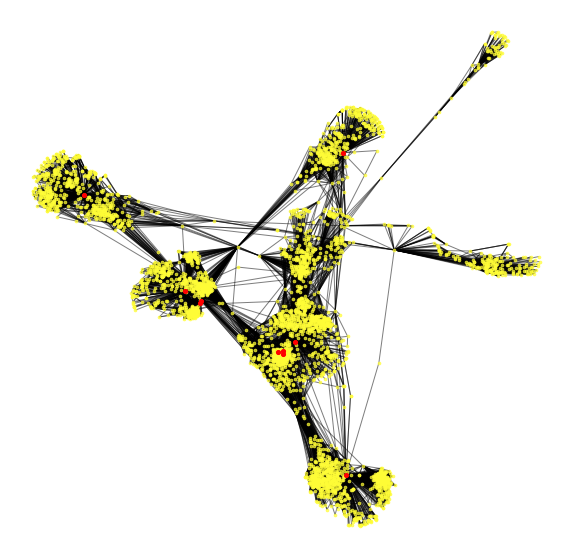

In [15]:
#PRINT

labels = ['' if v is None else v for v in labels]
dic_label = { nodes[labels.index(i)] : str(i) for i in labels }

print("Highlight nodes with the highest centrality:")
plot_network( G, position, nodes, centrality_10, 'r', True, True, dic_label)


**Betweenness**: measures how frequently a mode is in the shortest path between any two nodes

In [16]:
# warning!! the next command is realy slow

#betweenness = nx.betweenness_centrality(G) # compute the shortest-path betweenness centrality for nodes. return a dictionary
#with open('betweenness.p', 'wb') as fp:
#    pickle.dump(betweenness, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
with open('betweenness.p', 'rb') as fp:
    betweenness = pickle.load(fp)

We find the 10 people with highest betweenness. Betweenness centrality measures how important a node is to the shortest paths through the network. Hence, when we talk about links, it is important to find nodes which apprears more often.

In [25]:
high_btw = sorted(betweenness.items(), key=itemgetter(1), reverse=True) #sort
high_btw_10 = high_btw[0:10] # first ten nodes

labels= [None] * num_nodes

print("Nodes with highest BETWEENNESS CENTRALITY:")
for i in range(10):
    labels[int(np.array(high_btw_10)[i,0])]=str(i+1)
    print(f"Position #{i+1}: node; {high_btw_10[i][0]}, betw_cen: {high_btw_10[i][1]}")

Nodes with highest BETWEENNESS CENTRALITY:
Position #1: node; 107, betw_cen: 0.4805180785560152
Position #2: node; 1684, betw_cen: 0.3377974497301992
Position #3: node; 3437, betw_cen: 0.23611535735892905
Position #4: node; 1912, betw_cen: 0.2292953395868782
Position #5: node; 1085, betw_cen: 0.14901509211665306
Position #6: node; 0, betw_cen: 0.14630592147442917
Position #7: node; 698, betw_cen: 0.11533045020560802
Position #8: node; 567, betw_cen: 0.09631033121856215
Position #9: node; 58, betw_cen: 0.08436020590796486
Position #10: node; 428, betw_cen: 0.06430906239323866


Highlight nodes with the highest betweenness centrality:


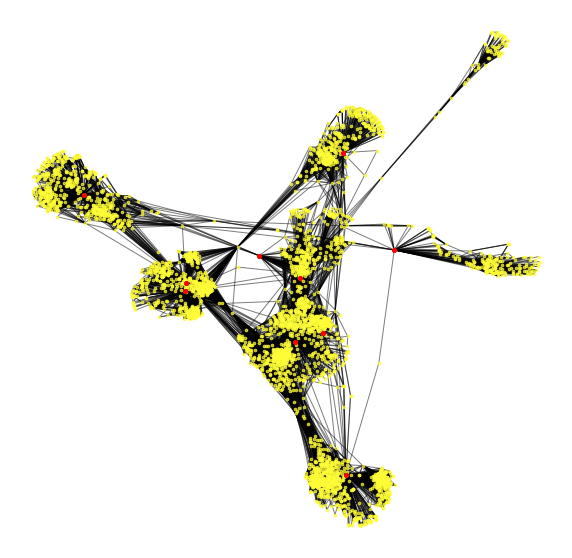

In [26]:
# PRINT
labels = ['' if v is None else v for v in labels]
dic_label = { nodes[labels.index(i)] : str(i) for i in labels }

print("Highlight nodes with the highest betweenness centrality:")
plot_network(G, position, nodes, np.array(high_btw_10)[:,0] , 'r', True, True, dic_label)

From the previous plot, it is evident that nodes (red ones) which links different clusters play a fundamental role. They have an high betw_cent because they are linked to a lot of people of diffrent clusters.Then, everytime that a path has to move from one cluster to another, it has to pass through them.

**Eigenvector Centrality**: is a measure of the influence of a node in a network. It quantifies how well connected a vertex is, especially to vertices that are themselves well connected.

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors.

Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores. 

Eigenvector centrality is a more sophisticated view of centrality: a person with few connections could have a very high eigenvector centrality if those few connections were to very well-connected others. Eigenvector centrality allows for connections to have a variable value, so that connecting to some vertices has more benefit than connecting to others.

In [27]:
# warning!! the next command is realy slow

#eigenv_centrality = nx.eigenvector_centrality(G) 
#with open('eigen_values.p', 'wb') as fp:
#    pickle.dump(eigenv_centrality, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
with open('eigen_values.p', 'rb') as fp:
    eigenv_centrality = pickle.load(fp)

In [29]:
high_eig_cen = sorted(eigenv_centrality.items(), key=itemgetter(1), reverse=True) #sort
high_eig_cen_10 = high_eig_cen[0:10] # first ten nodes

labels= [None] * num_nodes

print("Nodes with highest EIGENVECTOR CENTRALITY:")
for i in range(10):
    labels[int(np.array(high_eig_cen_10)[i,0])]=str(i+1)
    print(f"Position #{i+1}: node: {high_eig_cen_10[i][0]}, eig_cent: {high_eig_cen_10[i][1]}")

Nodes with highest EIGENVECTOR CENTRALITY:
Position #1: node: 1912, eig_cent: 0.09540696149067629
Position #2: node: 2266, eig_cent: 0.08698327767886553
Position #3: node: 2206, eig_cent: 0.08605239270584343
Position #4: node: 2233, eig_cent: 0.08517340912756598
Position #5: node: 2464, eig_cent: 0.08427877475676092
Position #6: node: 2142, eig_cent: 0.08419311897991796
Position #7: node: 2218, eig_cent: 0.08415573568055032
Position #8: node: 2078, eig_cent: 0.08413617041724979
Position #9: node: 2123, eig_cent: 0.08367141238206226
Position #10: node: 1993, eig_cent: 0.0835324284081597


Highlight nodes with the highest eigenvector centrality:


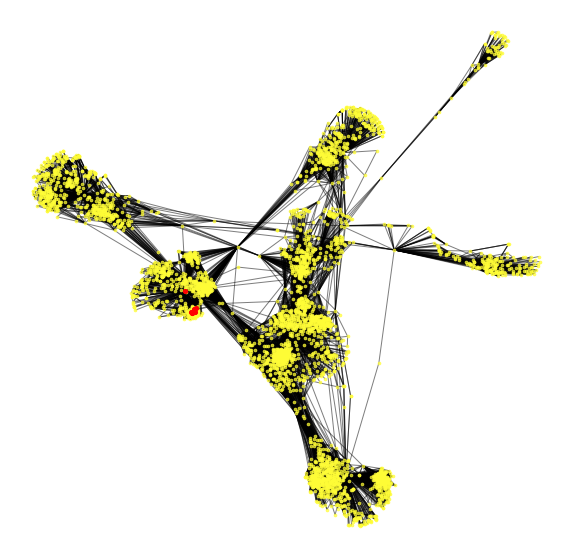

In [30]:
# PRINT

labels = ['' if v is None else v for v in labels]
dic_label = { nodes[labels.index(i)] : str(i) for i in labels }

print("Highlight nodes with the highest eigenvector centrality:")
plot_network(G, position, nodes, np.array(high_eig_cen_10)[:,0] , 'r', True, True, dic_label)


## Overall pattern/structure of the network

- density
- average path lenght

**Density**: proportions of connections that exists compared to the set of all edges that could exist

In [31]:
density = nx.density(G)

print(f"The density of the whole netwrork is {density}")

The density of the whole netwrork is 0.010819963503439287


The density is not so important when we look at the entire network. In fact, we can see that the graph is divided in clusters. We should look at the density inside each cluster. We will do it after we have defined these clusters.

It is normal thta, if we consider the whole network, we obtain a low density

**Average path length**: average lengths of shortest paths for all pairs of vertices

In [54]:
#av_path_len = nx.average_shortest_path_length(G)
with open('av_path_len.p', 'wb') as fp:
    pickle.dump(av_path_len, fp, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('av_path_len.p', 'rb') as fp:
    av_path_len = pickle.load(fp)

print(f"The average lengths of shortest paths of the whole netwrork is {av_path_len}")

KeyboardInterrupt: 

## Shortest Path for each node

In the previuos cells, we found the average path lenght for the whole network. The goal of our analysis is to find central players, so we need to find for each person, the average of all shortest paths to reach other nodes

In [32]:
# function for one specific node
def av_path_len_single_node(G,node):

    # single_source_dijkstra computes shortest paths and lengths in a weighted graph G.
    # Returns a tuple of two dictionaries keyed by node. The first dictionary stores distance from the source. 
    # The second stores the path from the source to that node.
    two_dict = nx.single_source_dijkstra(G,node)
    
    # we are interest only in values of the first dictionary
    values_len = list(two_dict)[0].values()

    #then we want the mean    
    return np.mean(list(values_len))

#av_path_len_node = [av_path_len_single_node(G,x) for x in nodes] # apply the function to all nodes
#with open('av_path_len_node.p', 'wb') as fp:
#    pickle.dump(av_path_len_node, fp, protocol=pickle.HIGHEST_PROTOCOL)


In [33]:
with open('av_path_len_node.p', 'rb') as fp:
    av_path_len_node = pickle.load(fp)

In [34]:
# save result in a dictionary. key:node, value: av_path_len_node. Then we sort
dictionary = dict(zip(nodes, av_path_len_node)) # create the dic
av_path_len_node_sorted = sorted(dictionary.items(), key=itemgetter(1)) #sort

av_path_len_node_sorted_10 = av_path_len_node_sorted[:10]

labels= [None] * num_nodes

print("Nodes with shorted path average:")
for i in range(10):
    labels[int(np.array(av_path_len_node_sorted_10)[i,0])]=str(i+1)
    print(f"Position #{i+1}: node {av_path_len_node_sorted_10[i][0]}, shortest path average: {av_path_len_node_sorted_10[i][1]}")


Nodes with shorted path average:
Position #1: node 107, shortest path average: 2.174795741520178
Position #2: node 58, shortest path average: 2.51572171329537
Position #3: node 428, shortest path average: 2.532062391681109
Position #4: node 563, shortest path average: 2.538004456548651
Position #5: node 1684, shortest path average: 2.539985144837831
Position #6: node 171, shortest path average: 2.6984402079722702
Position #7: node 348, shortest path average: 2.702649170586779
Position #8: node 483, shortest path average: 2.703144342659074
Position #9: node 414, shortest path average: 2.705372616984402
Position #10: node 376, shortest path average: 2.7274077742015352


Highlight nodes with the shorted path average::


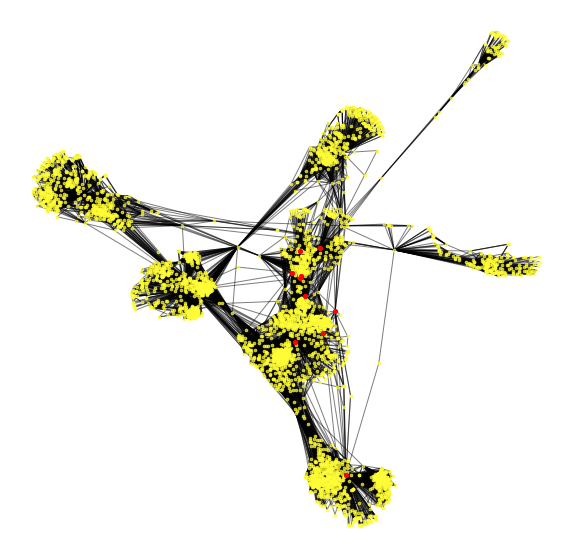

In [35]:
print("Highlight nodes with the shorted path average::")
plot_network( G, position, nodes, np.array(av_path_len_node_sorted_10)[:,0], 'r', True, True, dic_label)

## Most important nodes:
At this point we have most relevant nodes in terms of the following characteristics:
- Node degree
- Betweenness
- Eigenvector centrality
- Shortest path

**Common Plot**
Now, we plot all these different types of significant nodes

- Node degree : red
- Betweenness : light blue
- Eigenvector centrality : pink
- Shortest path : green

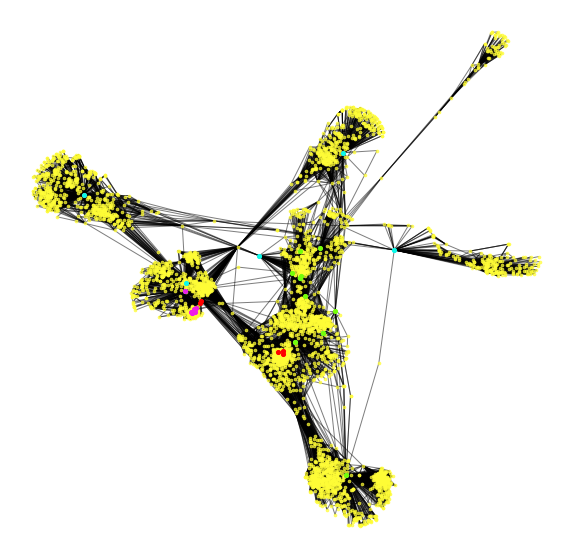

In [36]:
plot_network(G, position, nodes, centrality_10, 'r', True, False, [])
plot_network(G, position, nodes, np.array(high_btw_10)[:,0] , '#0bf9ea', False, False, [])
plot_network(G, position, nodes, np.array(high_eig_cen_10)[:,0]  , '#ef1de7' , False, False, [])
plot_network(G, position, nodes, np.array(av_path_len_node_sorted_10)[:,0]  , '#75fe08' , False, True, [])

In order to find most relevant nodes we create a dataframe where we same, for each node, its position in terms of the relevant features.

As first thing, for each feature we create one dataframe, thwn we merge them togheter. For exaample, in the first one, nodes are nodes number and pos_cent represents the importance of the node in terms of centrality

In [37]:
centrality_df = pd.DataFrame( data = [range(num_nodes),map(int, centrality)]).T.rename(columns={0: "pos_bet", 1: "nodes"})
centrality_df = centrality_df.sort_values(by="nodes").set_index("nodes")
centrality_df.head(10)

,pos_bet
nodes,
0,4
1,2561
2,3157
3,2528
4,3104
5,2858
6,3496
7,2286
8,3283


node 0 is number 5 (start from 0) in terms of importance. so it is quite important

In [38]:
# betweenness
high_betw = map(int, np.array(high_btw)[:,0])
high_betw_df = pd.DataFrame( data = [range(num_nodes),high_betw]).T.rename(columns={0: "pos_betw", 1: "nodes"})
high_betw_df = high_betw_df.sort_values(by="nodes").set_index("nodes")

# eigenvectore centrality
high_eig = map(int, np.array(high_eig_cen)[:,0])
high_eig_df = pd.DataFrame( data = [range(num_nodes),high_eig]).T.rename(columns={0: "pos_eig", 1: "nodes"})
high_eig_df = high_eig_df.sort_values(by="nodes").set_index("nodes")

# shortest path
av_path = map(int, np.array(av_path_len_node_sorted)[:,0])
av_path_df = pd.DataFrame( data = [range(num_nodes),av_path]).T.rename(columns={0: "pos_short_path", 1: "nodes"})
av_path_df = av_path_df.sort_values(by="nodes").set_index("nodes")

In [39]:
node_rank = pd.DataFrame(data = [range(num_nodes)] ).T
node_rank = pd.merge(node_rank, centrality_df,  left_index = True, right_index = True).set_index(0)
node_rank = pd.merge(node_rank, high_betw_df,  left_index = True, right_index = True)
node_rank = pd.merge(node_rank, high_eig_df,  left_index = True, right_index = True)
node_rank = pd.merge(node_rank, av_path_df,  left_index = True, right_index = True)
node_rank = node_rank.sort_index()
node_rank

,pos_bet,pos_betw,pos_eig,pos_short_path
0,,,,
0,4,5,1004,26
1,2561,2051,2065,2683
2,3157,3453,2253,2760
3,2528,2350,2054,2684
4,3104,3260,2250,2761
...,...,...,...,...
4034,3885,4036,3813,3888
4035,3985,4037,3832,3896
4036,3884,4038,3821,3889


At this point, we have a dataframe where, for each node, we have its rank for different features. Supposing that, each feature is equally important (the company can change the weight of each characteristics accoridng to its needs), now we can do the mean and find the global rank for each node.

In [40]:
# idea: in total_rank_point there is the rank mean of each node, in order to have a ranking in 0,1,2... the easiest thing is
#to order dataframe for this column, then add another column with integer 0,1,2... and then drop the total_rank_point column
node_rank["total_rank_point"] = (node_rank.pos_bet + node_rank.pos_betw + node_rank.pos_eig + node_rank.pos_short_path)/4
node_rank = node_rank.sort_values("total_rank_point")
node_rank["total_rank"] = range(num_nodes)

In [41]:
node_rank.head(10)

,pos_bet,pos_betw,pos_eig,pos_short_path,total_rank_point,total_rank
0,,,,,,
1912,2,3,0,27,8.00,0
1577,141,13,245,21,105.00,1
1718,197,15,337,22,142.75,2
1465,430,20,272,25,186.75,3
107,0,0,756,0,189.00,4
1663,9,88,758,43,224.50,5
1352,11,87,759,44,225.25,6
1126,47,102,760,51,240.00,7
1621,75,108,761,52,249.00,8


In [42]:
print("Most important nodes are: \n")

for i in range(15):
    print(f"Position #{i+1}: node {node_rank.index[i]}")

Most important nodes are: 

Position #1: node 1912
Position #2: node 1577
Position #3: node 1718
Position #4: node 1465
Position #5: node 107
Position #6: node 1663
Position #7: node 1352
Position #8: node 1126
Position #9: node 1621
Position #10: node 1835
Position #11: node 1376
Position #12: node 0
Position #13: node 925
Position #14: node 1420
Position #15: node 1361


In [44]:
node_rank = node_rank.drop(columns="total_rank_point").sort_index()
node_rank.head(10)

,pos_bet,pos_betw,pos_eig,pos_short_path,total_rank
0,,,,,
0,4,5,1004,26,11
1,2561,2051,2065,2683,2444
2,3157,3453,2253,2760,3199
3,2528,2350,2054,2684,2520
4,3104,3260,2250,2761,3118
5,2858,2207,1990,2730,2575
6,3496,3617,2296,2822,3385
7,2286,292,1053,2183,1312
8,3283,3153,2279,2788,3161


## Cluster Analysis

First of all, we indetify principal clusters

In [47]:
clusters = community_louvain.best_partition(G) #Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices

In [48]:
clusters

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 1,
 '35': 0,
 '36': 0,
 '37': 0,
 '38': 0,
 '39': 0,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 0,
 '48': 0,
 '49': 0,
 '50': 0,
 '51': 0,
 '52': 0,
 '53': 0,
 '54': 0,
 '55': 0,
 '56': 0,
 '57': 0,
 '58': 0,
 '59': 0,
 '60': 0,
 '61': 0,
 '62': 0,
 '63': 0,
 '64': 0,
 '65': 0,
 '66': 0,
 '67': 0,
 '68': 0,
 '69': 0,
 '70': 0,
 '71': 0,
 '72': 0,
 '73': 0,
 '74': 0,
 '75': 0,
 '76': 0,
 '77': 0,
 '78': 0,
 '79': 0,
 '80': 0,
 '81': 0,
 '82': 0,
 '83': 0,
 '84': 0,
 '85': 0,
 '86': 0,
 '87': 0,
 '88': 0,
 '89': 0,
 '90': 0,
 '91': 0,
 '92': 0,
 '93': 0,
 '94': 0,
 '95': 0,
 '96': 0,
 '97': 0,
 '98': 0,
 '99': 0,
 '100': 0,